In [1]:
from PIL import Image

import pytesseract

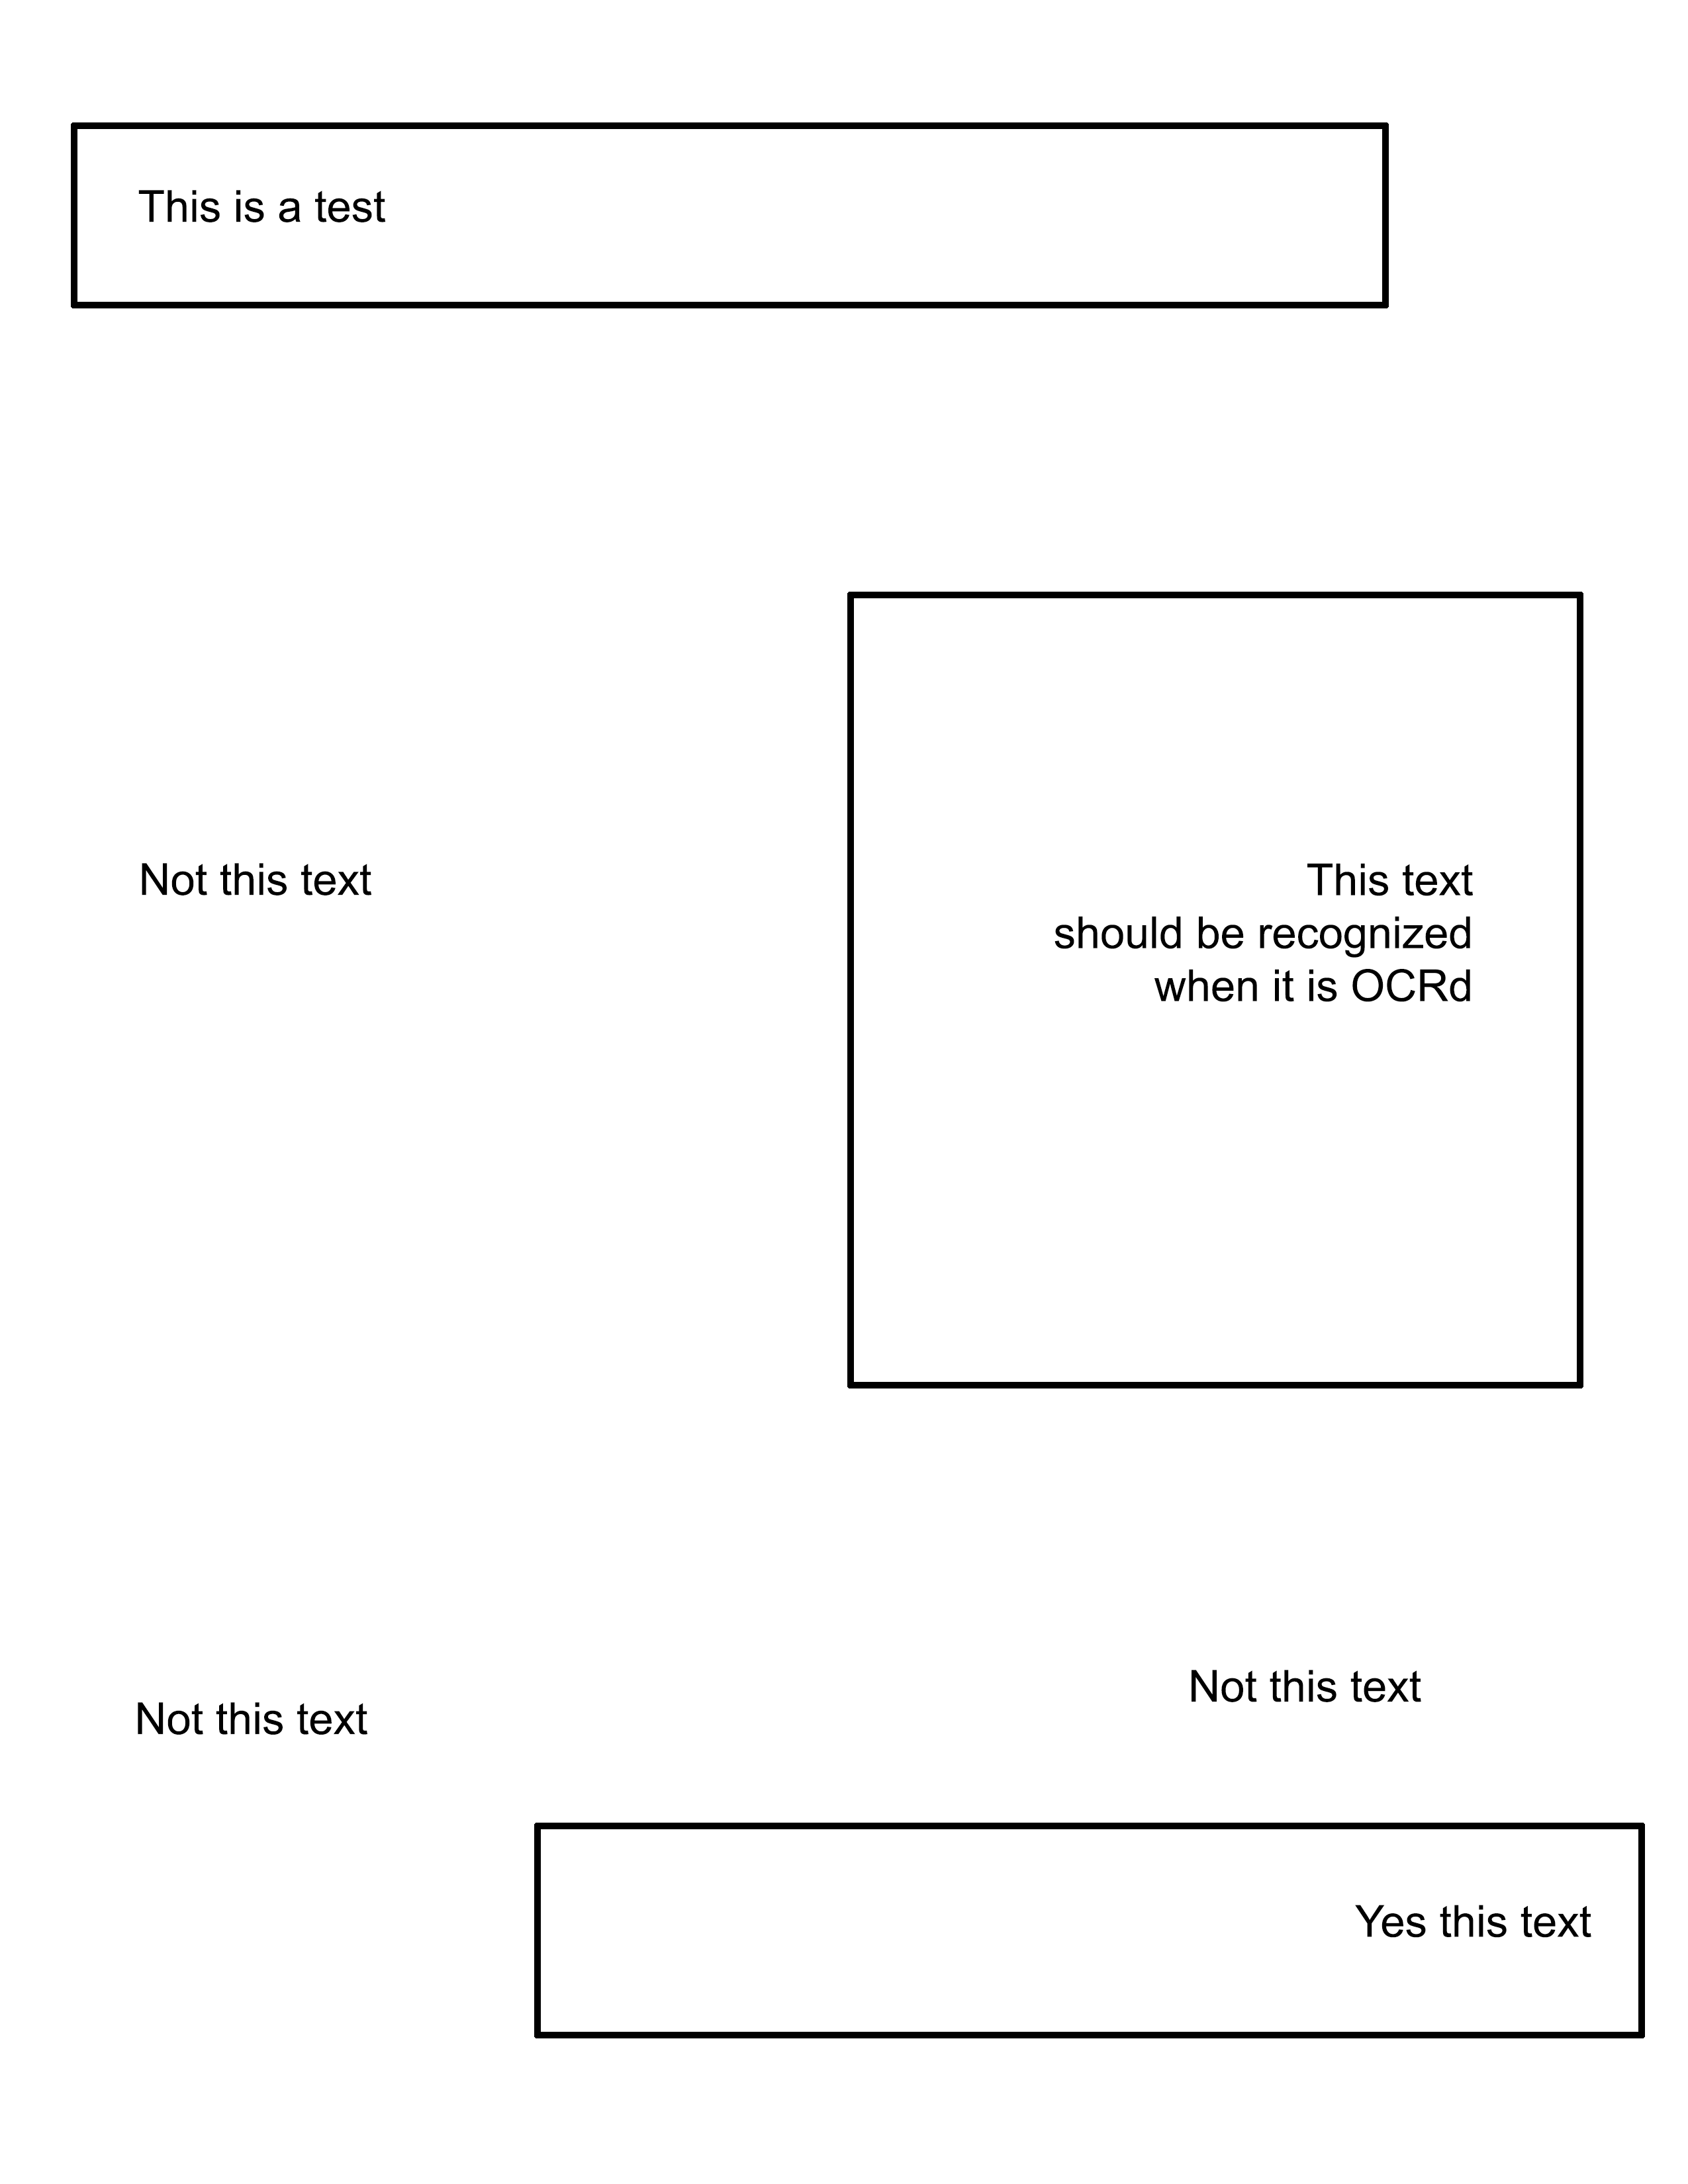

In [25]:
# Let's take an image
image = Image.open('1.png')
image

In [51]:
# Read in the uzn file
zones = [row.split(" ") for row in open("zone.uzn").read().splitlines()]
zones

[['108', '188', '1984', '280', 'Unnamed0'],
 ['1280', '904', '1108', '1184', 'Unnamed1'],
 ['816', '2752', '1656', '324', 'Unnamed2']]

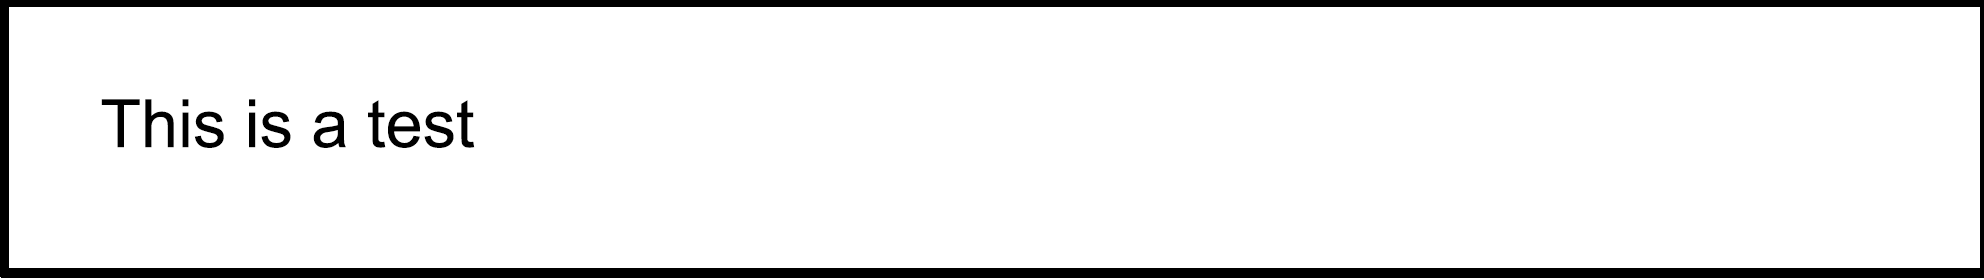

Unnamed0 is This is a test



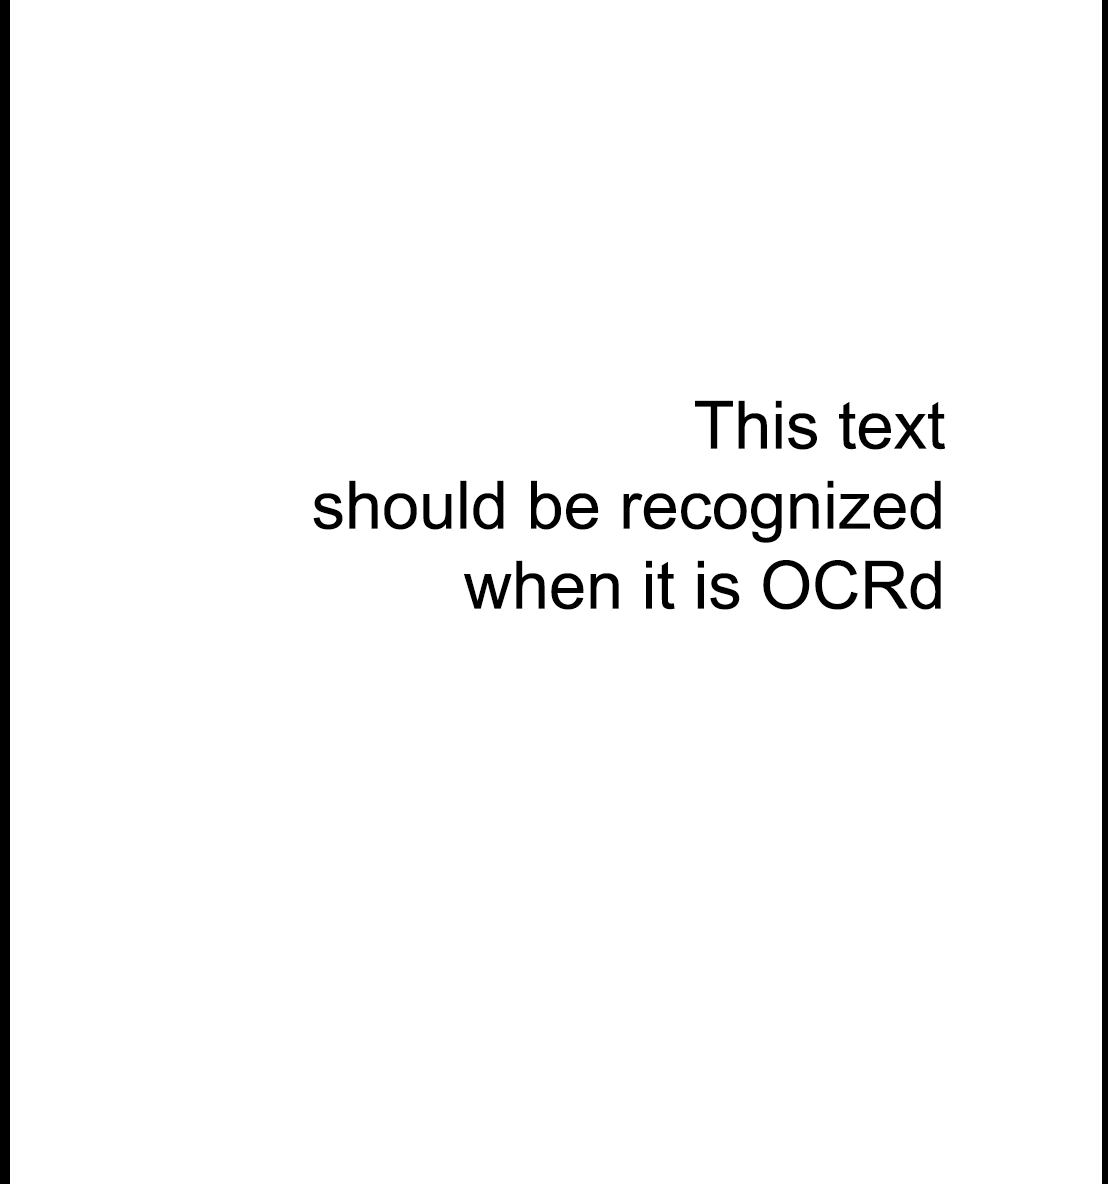

Unnamed1 is This text
should be recognized
when it is OCRd



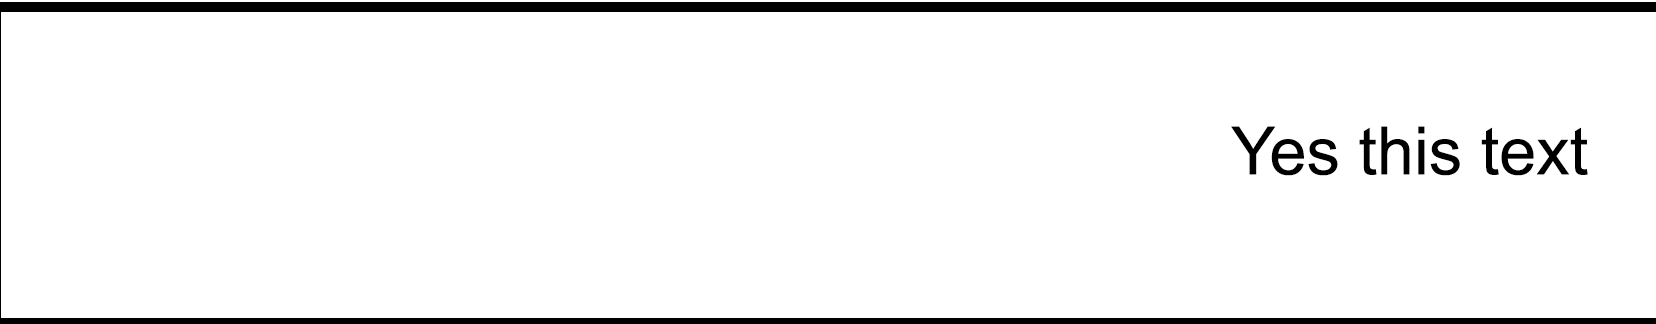

Unnamed2 is Yes this text



In [50]:
# left top width height freetext
for zone in zones:
    # Need to convert to integers
    left, top, width, height = [int(n) for n in zone[:4]]
    # Also pull out the description
    desc = zone[4]

    # Crop based on the uzn file
    cropped = image.crop([left, top, left + width, top + height])

    # Convert the cropped version to text
    text = pytesseract.image_to_string(cropped)
    
    # Print it all out
    display(cropped)
    print(desc, "is", text)